# 1.Supuestos iniciales del ejercicicio

Como en el ejercicio anterior, la siguiente tabla muestra los supuestos y su nomenclatura, que servirán como parámetros del ejercicio de la evaluación de inversión o proyecto.

| variable | símbolo definición | comentario |
|--|--|--|
| Inversión inicial| $M$ | se hace en el tiempo 0 |
| Plazo | $P$ | horizonte de evaluación|
| Ticket | $p$ | precio promedio unitario|
| Venta inicial | $V_0$ |  venta inicial mensual |
| Crecimiento (flujo) | $g$ | tasa de crecimiento mensual, puede ser cero al ser constante |
| Costos variables| $c$ | pueden ser insumos, materia prima y que representan un porcentaje de la venta|
| Gasto fijo |$G$| gastos fijos mensuales, como Arriendo, dividendo, etc.|
| Impuesto |$t$| impuestos a las empresas, como por ejemplo 20% de los régimen chileno|
| Tasa descuento |$tasa$_$descuento$| impuestos a las empresas, como por ejemplo 8% de los régimen chileno, útil para el cálculo del valor actual neto|

Luego, el valor de cada uno de los parámetros definidos es:

*   $M = \$45.000.000$
*   $P = 48$
*   $p = \$5.000$ (por ticket)
*   $V_0 = 70$ clientes diarios
*   $g = 1\%$ mensual incremendado según escenario
*   $c = 40\%$ (costos variables)
*   $G = \$4.000.000$ mensuales
*   $t = 20\%$
*   $tasa$_$descuento = 8\%$

Estos valores serán asignados en este ejercicio pero pueden ser modificados en virtud de la naturaleza de la inversión.

# 2.Creación del espacio necesario.

Para ejecutar el ejercicio de evaluación multi-escenario de una inversión, es necesario hacer la llamada o instalaciones de las librerias a utilizar.

## 2.1 Librerías de tratamiento de datos y visualización

In [1]:
%pip install numpy-financial

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy_financial import irr, npv
import warnings

warnings.filterwarnings("ignore")

## 2.2 Se declaran los parámetros del ejercicio

In [35]:
M = 45000000       # Inversión inicial
P = 48             # Horizonte en meses
p = 5000           # Precio promedio por venta
V0 = 40 * 30       # Clientes iniciales por mes
G = 4000000        # Gastos fijos mensuales
t = 0.2            # Tasa de impuesto corporativo (20%)
tasa_descuento = 0.08  # Para VAN

Adicionalmente se incorporan las condiciones para $N$ escenarios.

In [36]:
N = 1000
g_values = np.linspace(0.01, 0.09, N)
c_values = 0.0023 * g_values

##2.3 Vectores de resultados

In [37]:
tir_results = []
van_results = []
payback_results = []

## 3.Desarrollo

A continuación se desarrollará el flujo por periodos para posteriormente evaluar la inversión, en cada uno de los escenarios.

Por tanto código a continuación realiza una simulación de cuasi Monte Carlo para evaluar la viabilidad financiera del proyecto con los parámetros definidos anteriormente, calculando: el Valor Actual Neto (VAN), la Tasa Interna de Retorno (TIR) y el Período de Recuperación (Payback) para diferentes escenarios.

In [38]:
for i in range(N):
    g = g_values[i]
    c = c_values[i]

    flujo_mensual = []
    flujo_acumulado = []

    for n in range(P+1):
        if n == 0:
            flujo_mensual.append(-M)
            flujo_acumulado.append(-M)
        else:
            ventas_mes = p * V0 * ((1 + g) ** (n - 1))
            costos_var = c * ventas_mes
            uoai = ventas_mes - costos_var - G
            impuesto = t * uoai if uoai > 0 else 0
            flujo = uoai - impuesto

            flujo_mensual.append(flujo)
            flujo_acumulado.append(flujo_acumulado[-1] + flujo)

    # Calculamos VAN, TIR y Payback
    van = npv(tasa_descuento, flujo_mensual)
    tir = irr(flujo_mensual)

    # Payback
    payback = None
    for j, acumulado in enumerate(flujo_acumulado):
        if acumulado >= 0:
            payback = j
            break
    if payback is None:
        payback = np.nan  # No recupera en el período

    # Guardamos resultados
    van_results.append(van)
    tir_results.append(tir)
    payback_results.append(payback)

# 4.Confección resultados

Desde ahora, se puede ir generando el DataFrame para posteriormente ver los resultados.

In [39]:
df_resultados = pd.DataFrame({
    'g': g_values,
    'c': c_values,
    'VAN': van_results,
    'TIR': tir_results,
    'Payback (meses)': payback_results
})

In [40]:
pd.options.display.float_format = '{:,.2f}'.format

## 4.1 Gráficos de sensibilidad

In [41]:
plt.figure(figsize=(12, 8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

### 4.1.1 VAN vs tasa de crecimiento

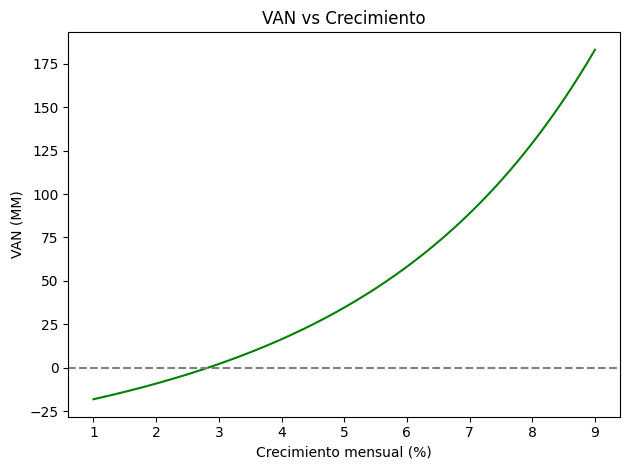

In [42]:
# VAN vs g
#plt.subplot(1, 3, 1)
plt.plot(df_resultados['g']*100, df_resultados['VAN']/1e6, color='green')
plt.title('VAN vs Crecimiento')
plt.xlabel('Crecimiento mensual (%)')
plt.ylabel('VAN (MM)')
plt.axhline(0, color='gray', linestyle='--')

plt.tight_layout()
plt.show()

### 4.1.2 TIR vs tasa de crécimiento

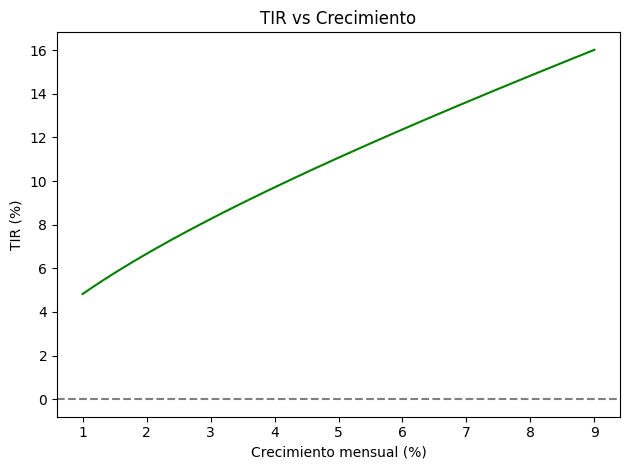

In [45]:
# TIR vs g
#plt.subplot(1, 3, 2)
plt.plot(df_resultados['g']*100, df_resultados['TIR']*100, color='green')
plt.title('TIR vs Crecimiento')
plt.xlabel('Crecimiento mensual (%)')
plt.ylabel('TIR (%)')
plt.axhline(0, color='gray', linestyle='--')
plt.tight_layout()
plt.show()

### 4.1.3 Payback vs tasa de crécimiento

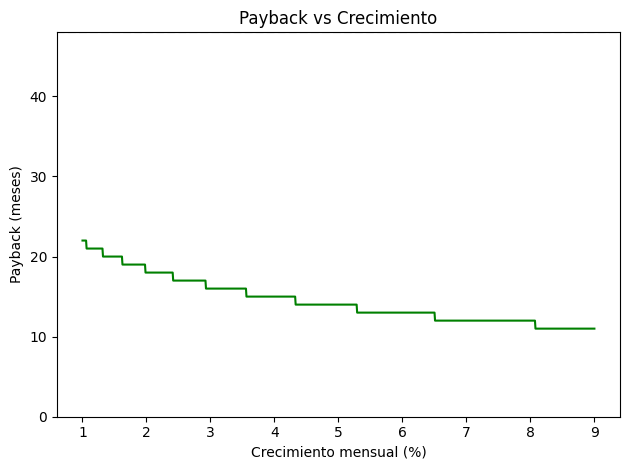

In [44]:
# Payback vs g
#plt.subplot(1, 3, 3)
plt.plot(df_resultados['g']*100, df_resultados['Payback (meses)'], color='green')
plt.title('Payback vs Crecimiento')
plt.xlabel('Crecimiento mensual (%)')
plt.ylabel('Payback (meses)')
plt.ylim(0, P)
plt.axhline(P, color='gray', linestyle='--')

plt.tight_layout()
plt.show()

## 4.2 Exposición de resultados

In [46]:
print("\nResumen de resultados:")
print(df_resultados.describe())


Resumen de resultados:
             g        c            VAN      TIR  Payback (meses)
count 1,000.00 1,000.00       1,000.00 1,000.00         1,000.00
mean      0.05     0.00  49,800,016.63     0.11            14.51
std       0.02     0.00  55,711,221.16     0.03             2.86
min       0.01     0.00 -18,184,664.79     0.05            11.00
25%       0.03     0.00   2,123,368.27     0.08            12.00
50%       0.05     0.00  34,593,962.30     0.11            14.00
75%       0.07     0.00  88,836,944.63     0.14            16.00
max       0.09     0.00 183,029,392.80     0.16            22.00


## 4.3 Análisis generativo

In [47]:
import openai
import os

In [29]:
# Configura tu clave aquí
os.environ["OPENAI_API_KEY"] = "your key"
openai.api_key = os.getenv("OPENAI_API_KEY")

### 4.4.1 Inputs y contexto

Se entregan las estadísticas de las métricas para la evaluación de proyecto, consideradas en este ejercicio.

In [48]:
estadisticas = df_resultados[['VAN', 'TIR', 'Payback (meses)']].describe()
selected_rows = ['mean', 'std', 'min', 'max']
result = estadisticas.loc[selected_rows]

In [49]:
personalidad = "Eres un asesor de inversiones. "

contexto = "Tienes una inversión de monto $" + str(M) + " evaluada para un periodo de " + str(P) + " meses, en " + str(N) + " en escenarios, " + " definidos para un crecimiento que parte en " + str(g_values.min()) + " y termina en " + str(g_values.max()) + " en partes iguales."

selected_rows_str = ", ".join(selected_rows)

antedecentes = "El resumen de los escenarios lo entrego para los estadísticos " + selected_rows_str + ' es:\n' + str(result) + '\n'
solicitud1 = " Entrégame un análisis para saber si invertir (obvía el rubro de inversión)."
solicitud2 = " Además dime las condiciones mínimas para una inversión conveniente, en caso de no cumplirse bajo ningún escenario, expresalo."

prompt = contexto + antedecentes + solicitud1 + solicitud2

### 4.4.2 Motor generativo Openai

In [50]:
response = openai.chat.completions.create(
    model="gpt-3.5-turbo",
    messages=[
        {"role": "system", "content": personalidad},
        {"role": "user", "content": prompt}
    ],
    max_tokens = 1024,
    temperature = 1
)

In [51]:
print(response.choices[0].message.content)

Para analizar si la inversión es conveniente, podemos considerar varios puntos clave:

1. Valor Esperado Neto (VAN): El VAN promedio de los escenarios es de $49,800,016.63, lo cual indica que en promedio se espera obtener un retorno positivo de casi $50 millones. Esto sugiere que, en general, la inversión tiene un potencial de rentabilidad atractivo.

2. Tasa Interna de Retorno (TIR): La TIR promedio es del 11%, lo cual es una tasa de retorno interesante. Esto significa que, en promedio, la inversión podría generar un rendimiento del 11% sobre el período de 48 meses.

3. Período de Recuperación (Payback): El período de recuperación promedio es de 14.51 meses, lo cual indica que se espera recuperar la inversión inicial en un poco más de un año.

Condiciones mínimas para una inversión conveniente:

- VAN positivo: Es importante que el VAN sea positivo en al menos la mayoría de los escenarios para considerar la inversión conveniente.
- TIR aceptable: La TIR debe ser igual o superior a la 

In [52]:
print(f"Versión de NumPy: {np.__version__}")
print(f"Versión de Pandas: {pd.__version__}")
print(f"Versión de Openai: {openai.__version__}")

try:
    import numpy_financial as npf
    print(f"Versión de numpy_financial: {npf.__version__}")
except ImportError:
    print("numpy_financial is not installed.")
except AttributeError:
    print("Could not get version for numpy_financial. It might not have a __version__ attribute.")

Versión de NumPy: 2.0.2
Versión de Pandas: 2.2.2
Versión de Openai: 1.86.0
Versión de numpy_financial: 1.0.0
